In [167]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
!pip install folium
import folium # map rendering library

In [168]:
# The code was removed by Watson Studio for sharing.

,Metro Station,Station Name,Line,Latitude,Longitude
0,七宝,Qibao,Line 9,31.155365,121.348824
1,三林,Sanlin,Line 11,31.143311,121.512324
2,三林东,Sanlin East,Line 11,31.146525,121.523234
3,三门路,Sanmen Road,Line 10,31.313091,121.507995
4,上南路,Shangnan Road,Line 6,31.149112,121.506413


In [169]:
address = 'Shanghai, China'
geolocator = Nominatim(user_agent="shanghai_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Shanghai are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Shanghai are 31.2322758, 121.4692071.


In [170]:
map_shanghaimetro = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, line, stationname in zip(df_data_1['Latitude'], df_data_1['Longitude'], df_data_1['Line'], df_data_1['Station Name']):
    label = '{}, {}'.format(stationname, line)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_shanghaimetro)  
    
map_shanghaimetro

In [171]:

body = client_3695b1bee981492fbe2477e88e037316.get_object(Bucket='courseraweek9capstoneproject-donotdelete-pr-gclzbwdlnvgigp',Key='SH_Hospital.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_2 = pd.read_csv(body)
df_data_2.head()


,Hospital,Latitude,Longitude
0,Zhongshan Hospital,31.196552,121.456797
1,Huashan Hospital,31.212233,121.433824
2,Huadong Hospital,31.219098,121.440832
3,Children's Hospital of Fudan University,31.198649,121.454444
4,Red House Hospital (Fudan OBGYN Hospital),31.259186,121.535251


In [172]:
map_shanghaihospital = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, hospital in zip(df_data_2['Latitude'], df_data_2['Longitude'], df_data_2['Hospital']):
    label = '{}'.format(hospital)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.7,
        parse_html=False).add_to(map_shanghaihospital)  
    
map_shanghaihospital

In [173]:
CLIENT_ID = 'YY1RWDDPGP4FBF0VNJ0C0IBURW2XK413YLVSKJH2ZY2AVYWC' # your Foursquare ID
CLIENT_SECRET = 'OX5DE4GJDHBY4DQ4CXWK4BUCXXOWVGR0HARMP4WNKIBWZ3CZ' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: YY1RWDDPGP4FBF0VNJ0C0IBURW2XK413YLVSKJH2ZY2AVYWC
CLIENT_SECRET:OX5DE4GJDHBY4DQ4CXWK4BUCXXOWVGR0HARMP4WNKIBWZ3CZ


In [174]:
#combine both map to find whether any overlapping/close proximiy of two scenario occurs
map_shanghai = folium.Map(location=[latitude, longitude], zoom_start=12)

# add metro stataion markers to map
for lat, lng, line, stationname in zip(df_data_1['Latitude'], df_data_1['Longitude'], df_data_1['Line'], df_data_1['Station Name']):
    label = '{}, {}'.format(stationname, line)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_shanghai)  
    
# add hospital markers to map
for lat, lng, hospital in zip(df_data_2['Latitude'], df_data_2['Longitude'], df_data_2['Hospital']):
    label = '{}'.format(hospital)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=1.2,
        parse_html=False).add_to(map_shanghai) 
    
    
    # Adds tool to the top right
from folium.plugins import MeasureControl
map_shanghai.add_child(MeasureControl())

# Measurement ruler icon tool to measure distances in map
from folium.plugins import FloatImage
url = ('https://media.licdn.com/mpr/mpr/shrinknp_100_100/AAEAAQAAAAAAAAlgAAAAJGE3OTA4YTdlLTkzZjUtNDFjYy1iZThlLWQ5OTNkYzlhNzM4OQ.jpg')
FloatImage(url, bottom=5, left=85).add_to(map_shanghai)
map_shanghai

From this map, I can find a couple fo locations that fit my requirement. \
Dive deeper by setting Huangpu area as centre point and explore around Huangpu. \
I am able to verify which hospital is listed after exploration.

In [175]:
#Explore neighbourhood by setting Jing An Temple as centre point (my first location to consider)
address = 'Jing An Temple'
geolocator = Nominatim(user_agent="SH_explorer")
uot_location = geolocator.geocode(address)
uot_latitude = location.latitude
uot_longitude = location.longitude
print('The geograpical coordinate of Jing An Temple are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Jing An Temple are 31.2322758, 121.4692071.


In [176]:
#let's get 50 venues that are in Jing An Temple within a radius of 500 meters.
LIMIT = 50 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
search_query = 'Chinese Restaurant'
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    latitude, 
    longitude, 
    VERSION, 
    search_query, 
    radius, 
    LIMIT)


url

'https://api.foursquare.com/v2/venues/search?client_id=YY1RWDDPGP4FBF0VNJ0C0IBURW2XK413YLVSKJH2ZY2AVYWC&client_secret=OX5DE4GJDHBY4DQ4CXWK4BUCXXOWVGR0HARMP4WNKIBWZ3CZ&ll=31.2322758,121.4692071&v=20180605&query=Chinese Restaurant&radius=500&limit=50'

In [177]:
#Send the GET request and examine the resutls
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5faf8fcbebf7ed0526376f1b'},
 'response': {'venues': [{'id': '4b0588c2f964a52085d822e3',
    'name': 'Ai Mei Chinese Restaurant (艾美轩)',
    'location': {'address': '南京东路789号8F | 789 Nanjing Dong Lu',
     'crossStreet': '上海皇家艾美酒店内',
     'lat': 31.236211971449663,
     'lng': 121.4706673383682,
     'labeledLatLngs': [{'label': 'display',
       'lat': 31.236211971449663,
       'lng': 121.4706673383682}],
     'distance': 459,
     'postalCode': '200001',
     'cc': 'CN',
     'city': 'Huangpu',
     'state': '上海市',
     'country': '中国',
     'formattedAddress': ['南京东路789号8F | 789 Nanjing Dong Lu (上海皇家艾美酒店内)',
      'Huangpu',
      '上海市, 200001',
      '中国']},
    'categories': [{'id': '4bf58dd8d48988d1f5931735',
      'name': 'Dim Sum Restaurant',
      'pluralName': 'Dim Sum Restaurants',
      'shortName': 'Dim Sum',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/dimsum_',
       'suffix': '.png'},
      'primary': True}],

In [178]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


,id,name,categories,referralId,hasPerk,location.address,location.crossStreet,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress,venuePage.id,location.neighborhood
0,4b0588c2f964a52085d822e3,Ai Mei Chinese Restaurant (艾美轩),"[{'id': '4bf58dd8d48988d1f5931735', 'name': 'D...",v-1605341131,False,南京东路789号8F | 789 Nanjing Dong Lu,上海皇家艾美酒店内,31.236212,121.470667,"[{'label': 'display', 'lat': 31.23621197144966...",459,200001,CN,Huangpu,上海市,中国,"[南京东路789号8F | 789 Nanjing Dong Lu (上海皇家艾美酒店内),...",NaN,NaN
1,5386909f498e49f2a511ee9b,Chinese Breakfast,"[{'id': '4bf58dd8d48988d143941735', 'name': 'B...",v-1605341131,False,NaN,NaN,31.234238,121.463569,"[{'label': 'display', 'lat': 31.23423843212019...",579,NaN,CN,上海市,上海市,中国,"[上海市, 上海市, 中国]",NaN,NaN
2,4b0588c1f964a52020d822e3,ROOF 325 Rooftop Restaurant & Bar,"[{'id': '52e81612bcbc57f1066b79f9', 'name': 'M...",v-1605341131,False,"325 Nanjing Xi Lu, 5/F, Shanghai Art Museum | ...",Huangpi Bei Lu | 近黄陂北路,31.232848,121.466538,"[{'label': 'display', 'lat': 31.23284767608766...",261,200003,CN,Huangpu,上海市,中国,"[325 Nanjing Xi Lu, 5/F, Shanghai Art Museum |...",147841871,NaN
3,4cde7f61c4f6a35d802bca6c,Charme Restaurant (港丽餐厅),"[{'id': '52af3a7c3cf9994f4e043bed', 'name': 'C...",v-1605341131,False,268 Xizang Rd | 西藏中路268号,6/F Raffles City | 来福士广场,31.234173,121.472205,"[{'label': 'display', 'lat': 31.23417308379205...",354,200085,CN,Huangpu,上海市,中国,[268 Xizang Rd | 西藏中路268号 (6/F Raffles City | ...,NaN,People's SQ
4,4be3fe38d27a20a17368935b,ARK Restaurant & Lounge Bar (雅科),"[{'id': '4bf58dd8d48988d145941735', 'name': 'C...",v-1605341131,False,南京西路248号大光明电影院3楼,近黄河路,31.234745,121.466802,"[{'label': 'display', 'lat': 31.23474547612743...",357,200003,CN,Huangpu,上海市,中国,"[南京西路248号大光明电影院3楼 (近黄河路), Huangpu, 上海市, 200003...",NaN,NaN
5,4fb79150e4b0ef4941442b46,Kungfu Restaurant (真功夫),"[{'id': '4bf58dd8d48988d16e941735', 'name': 'F...",v-1605341131,False,NaN,NaN,31.236265,121.470841,"[{'label': 'display', 'lat': 31.23626456124482...",470,NaN,CN,Huangpu,上海市,中国,"[Huangpu, 上海市, 中国]",NaN,NaN
6,4e86eb2c722e2f21dede6a3c,TAI HING Restaurant (太兴餐厅),"[{'id': '52af3add3cf9994f4e043bf5', 'name': 'H...",v-1605341131,False,268 Xizang Rd | 西藏中路268号,5/F-07 Raffles City | 来福士广场,31.234368,121.471842,"[{'label': 'display', 'lat': 31.23436778888616...",342,200085,CN,Huangpu,上海市,中国,[268 Xizang Rd | 西藏中路268号 (5/F-07 Raffles City...,NaN,People's SQ
7,4c9f470519e4236a894d5789,Favola Italian Restaurant 法沃莱意大利餐厅,"[{'id': '4bf58dd8d48988d110941735', 'name': 'I...",v-1605341131,False,"789 East Nanjing Rd, 8F 南京东路789号8楼",Middle Xizang Rd 西藏中路,31.235800,121.471028,"[{'label': 'display', 'lat': 31.23579973511292...",428,200001,CN,Huangpu,上海市,中国,"[789 East Nanjing Rd, 8F 南京东路789号8楼 (Middle Xi...",78909800,黄埔
8,4cf89cd86cee236ade03e803,Kungfu Restaurant (真功夫),"[{'id': '4bf58dd8d48988d16e941735', 'name': 'F...",v-1605341131,False,NaN,New World City | 上海新世界城,31.236845,121.469098,"[{'label': 'display', 'lat': 31.23684535942169...",508,NaN,CN,Huangpu,上海市,中国,"[Huangpu, 上海市, 中国]",NaN,NaN
9,4bee1d65a40fc9284d19830c,Lisboa Restaurant (葡京茶餐厅),"[{'id': '4bf58dd8d48988d145941735', 'name': 'C...",v-1605341131,False,93-111 Huaihai M Rd | 淮海中路93-111号,B1/F Times Square | 大上海时代广场,31.226940,121.474159,"[{'label': 'display', 'lat': 31.22694008513559...",758,200021,CN,Huangpu,上海市,中国,[93-111 Huaihai M Rd | 淮海中路93-111号 (B1/F Times...,NaN,Huáihǎi Zhōnglù


In [179]:
    # keep only columns that include venue name, and anything that is associated with location
    filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
    dataframe_filtered = dataframe.loc[:, filtered_columns]

    # function that extracts the category of the venue
    def get_category_type(row):
        try:
            categories_list = row['categories']
        except:
            categories_list = row['venue.categories']

        if len(categories_list) == 0:
            return None
        else:
            return categories_list[0]['name']

    # filter the category for each row
    dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

    # clean column names by keeping only last term
    dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

    dataframe_filtered

,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,neighborhood,id
0,Ai Mei Chinese Restaurant (艾美轩),Dim Sum Restaurant,南京东路789号8F | 789 Nanjing Dong Lu,上海皇家艾美酒店内,31.236212,121.470667,"[{'label': 'display', 'lat': 31.23621197144966...",459,200001,CN,Huangpu,上海市,中国,"[南京东路789号8F | 789 Nanjing Dong Lu (上海皇家艾美酒店内),...",NaN,4b0588c2f964a52085d822e3
1,Chinese Breakfast,Breakfast Spot,NaN,NaN,31.234238,121.463569,"[{'label': 'display', 'lat': 31.23423843212019...",579,NaN,CN,上海市,上海市,中国,"[上海市, 上海市, 中国]",NaN,5386909f498e49f2a511ee9b
2,ROOF 325 Rooftop Restaurant & Bar,Modern European Restaurant,"325 Nanjing Xi Lu, 5/F, Shanghai Art Museum | ...",Huangpi Bei Lu | 近黄陂北路,31.232848,121.466538,"[{'label': 'display', 'lat': 31.23284767608766...",261,200003,CN,Huangpu,上海市,中国,"[325 Nanjing Xi Lu, 5/F, Shanghai Art Museum |...",NaN,4b0588c1f964a52020d822e3
3,Charme Restaurant (港丽餐厅),Cantonese Restaurant,268 Xizang Rd | 西藏中路268号,6/F Raffles City | 来福士广场,31.234173,121.472205,"[{'label': 'display', 'lat': 31.23417308379205...",354,200085,CN,Huangpu,上海市,中国,[268 Xizang Rd | 西藏中路268号 (6/F Raffles City | ...,People's SQ,4cde7f61c4f6a35d802bca6c
4,ARK Restaurant & Lounge Bar (雅科),Chinese Restaurant,南京西路248号大光明电影院3楼,近黄河路,31.234745,121.466802,"[{'label': 'display', 'lat': 31.23474547612743...",357,200003,CN,Huangpu,上海市,中国,"[南京西路248号大光明电影院3楼 (近黄河路), Huangpu, 上海市, 200003...",NaN,4be3fe38d27a20a17368935b
5,Kungfu Restaurant (真功夫),Fast Food Restaurant,NaN,NaN,31.236265,121.470841,"[{'label': 'display', 'lat': 31.23626456124482...",470,NaN,CN,Huangpu,上海市,中国,"[Huangpu, 上海市, 中国]",NaN,4fb79150e4b0ef4941442b46
6,TAI HING Restaurant (太兴餐厅),Hong Kong Restaurant,268 Xizang Rd | 西藏中路268号,5/F-07 Raffles City | 来福士广场,31.234368,121.471842,"[{'label': 'display', 'lat': 31.23436778888616...",342,200085,CN,Huangpu,上海市,中国,[268 Xizang Rd | 西藏中路268号 (5/F-07 Raffles City...,People's SQ,4e86eb2c722e2f21dede6a3c
7,Favola Italian Restaurant 法沃莱意大利餐厅,Italian Restaurant,"789 East Nanjing Rd, 8F 南京东路789号8楼",Middle Xizang Rd 西藏中路,31.235800,121.471028,"[{'label': 'display', 'lat': 31.23579973511292...",428,200001,CN,Huangpu,上海市,中国,"[789 East Nanjing Rd, 8F 南京东路789号8楼 (Middle Xi...",黄埔,4c9f470519e4236a894d5789
8,Kungfu Restaurant (真功夫),Fast Food Restaurant,NaN,New World City | 上海新世界城,31.236845,121.469098,"[{'label': 'display', 'lat': 31.23684535942169...",508,NaN,CN,Huangpu,上海市,中国,"[Huangpu, 上海市, 中国]",NaN,4cf89cd86cee236ade03e803
9,Lisboa Restaurant (葡京茶餐厅),Chinese Restaurant,93-111 Huaihai M Rd | 淮海中路93-111号,B1/F Times Square | 大上海时代广场,31.226940,121.474159,"[{'label': 'display', 'lat': 31.22694008513559...",758,200021,CN,Huangpu,上海市,中国,[93-111 Huaihai M Rd | 淮海中路93-111号 (B1/F Times...,Huáihǎi Zhōnglù,4bee1d65a40fc9284d19830c


In [184]:
venue_id = '4b0588c1f964a52020d822e3' # ID of the restaurant
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)

result = requests.get(url).json()
#result = requests.get(url).json()
#print(result['response']['venue'].keys())
result['response']['venue']
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

KeyError: 'venue'

In [181]:

body = client_3695b1bee981492fbe2477e88e037316.get_object(Bucket='courseraweek9capstoneproject-donotdelete-pr-gclzbwdlnvgigp',Key='SH_Restaurant_Ratings.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_3 = pd.read_csv(body)
df_data_3.head()


,categories,ratings
0,Ai Mei Chinese Restaurant (艾美轩),5.6
1,Chinese Breakfast,0.0
2,ROOF 325 Rooftop Restaurant & Bar,7.1
3,Charme Restaurant (港丽餐厅),5.6
4,TAI HING Restaurant (太兴餐厅),5.5


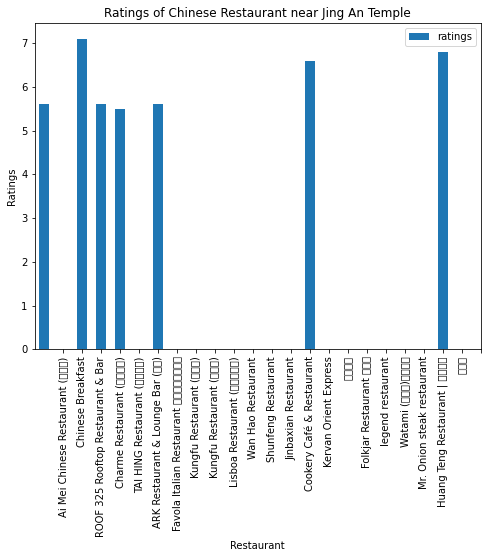

In [183]:
import matplotlib as mpl
import matplotlib.pyplot as plt

df_data_3.plot(kind='bar', figsize=(8, 6))
plt.title('Ratings of Chinese Restaurant near Jing An Temple') # add title to the plot

plt.xticks(np.arange(1,24), df_data_3['categories'], rotation=90)

plt.xlabel('Restaurant') # add to x-label to the plot
plt.ylabel('Ratings') # add y-label to the plot


plt.show()